# Pendeteksi penyakit paru-paru menggunakan Deep-Multi-Layered CNN

#### Dataset

(Google Drive)
> https://drive.google.com/drive/folders/1oAJUw2UChrYMqUwLB8F-4RuX19WoeqsN?usp=sharing

(covid-chestxray-dataset)
> https://github.com/ieee8023/covid-chestxray-dataset


(Actualmed-COVID-chestxray-dataset)
> https://github.com/agchung/Actualmed-COVID-chestxray-dataset

(Kaggle Chest X-Ray Images (Pneumonia))
> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
## Library that we used
import tensorflow as tf
import glob 
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization, Flatten, Input, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import load_model
from keras.layers.core import Activation, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Model
from joblib import dump
le = LabelEncoder()

In [ ]:
# Actumed Dir Local Jessica
path = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Actualmed-COVID-chestxray-dataset-master-20220416T062843Z-001\Actualmed-COVID-chestxray-dataset-master"

# Kaggle Dir Local Jessica
path2 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\kaggle-20220416T062842Z-001\kaggle"

# Kaggle Covid Dir Jessica
path3 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Kaggle Radiography"

In [2]:
# Actuamed Dir Local ALbert
path = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\Actualmed-COVID-chestxray-dataset-master"

# Kaggle (Normal and Pneumonia) Dir Albert
path2 = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\kaggle"

# Kaggle (Covid and Normal) Dir Albert
path3 = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\\Kaggle Radiography"

In [3]:
## Label for Kaggle (Normal and Pneumonia) Dataset
class_label_kaggle = ["NORMAL","PNEUMONIA"]
class_names_label = {class_label_kaggle:i for i, class_label_kaggle in enumerate(class_label_kaggle)}
# class_labelname_kaggle = le.transform(class_label_kaggle)

if(class_names_label["NORMAL"]!=1 and class_names_label["PNEUMONIA"]!=2):
    class_names_label["NORMAL"] = 1
    class_names_label["PNEUMONIA"] = 2

class_names_label

{'NORMAL': 1, 'PNEUMONIA': 2}

In [4]:
def labelling_kaggle(class_names_label,path,dataset_image,dataset_label,size):
    print("Loading {}".format(path))
    for folder in os.listdir(path):
        label = class_names_label[folder]
        print(folder)
        for file in tqdm(os.listdir(os.path.join(path, folder))):
            img_path = os.path.join(os.path.join(path, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (size, size))
            dataset_image.append(image)
            dataset_label.append(label)
    dataset_image = np.array(dataset_image, dtype = 'float32')
    dataset_label = np.array(dataset_label, dtype = 'int32')

In [5]:
images1 = []
labels1 = []
labelling_kaggle(class_names_label,path2,images1,labels1,128)

Loading C:\Users\alber\Desktop\Semester 6\Pengolahan Citra Digital\Python\kaggle
NORMAL


100%|██████████| 1583/1583 [01:03<00:00, 24.95it/s]


PNEUMONIA


100%|██████████| 4273/4273 [01:15<00:00, 56.50it/s]


In [6]:
os.listdir(path2)

['NORMAL', 'PNEUMONIA']

In [7]:
## Label for Kaggle Radiography Dataset
class_label_kaggle_radiography = ["COVID", "NORMAL"]
le.fit(class_label_kaggle_radiography)
class_names_label_kaggle_radiography = {class_label_kaggle_radiography:i for i, class_label_kaggle_radiography in enumerate(class_label_kaggle_radiography)}

if(class_names_label_kaggle_radiography["COVID"]!=0 and class_names_label_kaggle_radiography["NORMAL"]!=1):
    class_names_label_kaggle_radiography["COVID"] = 0
    class_names_label_kaggle_radiography["NORMAL"] = 1

In [8]:
class_names_label_kaggle_radiography

{'COVID': 0, 'NORMAL': 1}

In [9]:
# Making label for kaggle radiography dataset
images2 = []
labels2 = []
labelling_kaggle(class_names_label_kaggle_radiography,path3,images2,labels2,128)

Loading C:\Users\alber\Desktop\Semester 6\Pengolahan Citra Digital\Python\Kaggle Radiography
COVID


100%|██████████| 3616/3616 [00:14<00:00, 256.50it/s]


NORMAL


100%|██████████| 2616/2616 [00:10<00:00, 260.85it/s]


In [10]:
class_names_label_kaggle_radiography

{'COVID': 0, 'NORMAL': 1}

In [11]:
os.listdir(path3)

['COVID', 'NORMAL']

In [12]:
# Actuamed Dataset
source = np.asarray(pd.read_csv(path + '\\metadata.csv'))

In [13]:
## Dataframe Actuamed
df = pd.DataFrame(source, columns=['patientid',	'offset', 'sex',	'age',	'finding',	
                                   'survival',	'temperature',	'pO2 saturation',	'view',	
                                   'modality',	'imagename','artifacts distortion',	'notes'])
df

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,imagename,artifacts distortion,notes
0,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313090023421...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
1,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313100318375...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
2,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317090830828...,NaN,Negative (covid-19 viral infection is excluded...
3,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317104341875...,NaN,Negative (covid-19 viral infection is excluded...
4,ANON196,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200318082923328...,NaN,", date taken (YYYYMMDD): 20200318"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ANON33,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420155936364...,NaN,Negative (covid-19 viral infection is excluded...
234,ANON41,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420164750991...,NaN,Negative (covid-19 viral infection is excluded...
235,ANON93,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420190511734...,NaN,Negative (covid-19 viral infection is excluded...
236,ANON59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420203606112...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200420"


In [14]:
## Actuamed
data = []
labels = []
for i in source:
  img = cv2.imread(path +'\\images\\'+ i[10])
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  label = i[4]
  data.append(img)
  labels.append(label)
data = np.array(data)
labels = np.array(labels)

In [15]:
## Cek buat dataset actuamed, kalo datanya bersifat Nan artinya pneumonia
a = ['COVID-19', 'No finding']
for i in range(len(labels)): 
  if labels[i] not in a:
    labels[i] = 'pneumonia'

In [16]:
## Encoder label for actualmed
le.fit(labels)
labels = le.transform(labels)

In [17]:
labels

array([2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2])

In [18]:
## Combine the dataset (Actuamed & Kaggle Radiography & Kaggle CXR)
new_label = np.concatenate((labels, labels1, labels2), axis=0)
new_data = np.concatenate((data, images1, images2), axis=0)

In [19]:
## Sebelum d normalisasi
new_data

array([[[[ 21,  21,  21],
         [ 16,  16,  16],
         [ 14,  14,  14],
         ...,
         [ 12,  12,  12],
         [ 12,  12,  12],
         [ 14,  14,  14]],

        [[ 15,  15,  15],
         [ 14,  14,  14],
         [ 12,  12,  12],
         ...,
         [ 12,  12,  12],
         [ 13,  13,  13],
         [ 16,  16,  16]],

        [[ 15,  15,  15],
         [ 15,  15,  15],
         [ 12,  12,  12],
         ...,
         [ 12,  12,  12],
         [ 13,  13,  13],
         [ 15,  15,  15]],

        ...,

        [[  5,   5,   5],
         [  5,   5,   5],
         [  4,   4,   4],
         ...,
         [104, 104, 104],
         [ 85,  85,  85],
         [ 72,  72,  72]],

        [[  5,   5,   5],
         [  6,   6,   6],
         [  5,   5,   5],
         ...,
         [100, 100, 100],
         [ 89,  89,  89],
         [ 66,  66,  66]],

        [[  5,   5,   5],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         [115, 115, 115],
        

In [20]:
# dibagi 255 untuk normalisasi
new_data = new_data/255.

In [21]:
## Sesudah di normalisasi
new_label

array([2, 2, 1, ..., 1, 1, 1])

In [22]:
new_data

array([[[[0.08235294, 0.08235294, 0.08235294],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.05490196, 0.05490196],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882],
         [0.05490196, 0.05490196, 0.05490196]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05490196, 0.05490196, 0.05490196],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05098039, 0.05098039, 0.05098039],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.04705882, 0.04705882, 0.04705882],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05098039, 0.05098039, 0.05098039],
         [0.05882353, 0.05882353, 0.05882353]],

        ...,

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784]

In [23]:
new_data.shape

(12326, 128, 128, 3)

In [64]:
new_data = new_data.reshape(len(new_data), 128, 128, 3)

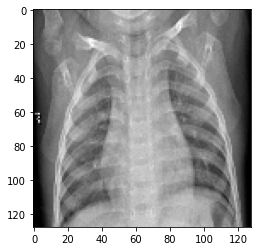

In [66]:
plt.imshow(new_data[1000], cmap = 'gray')

In [67]:
# Check how many data each of the class feature 
# 0 -> covid
# 1 -> normal
# 2 -> pneumonia
print(len(np.where(new_label == 0)[0]))
print(len(np.where(new_label == 1)[0]))
print(len(np.where(new_label == 2)[0]))

3674
4326
4326


In [76]:
## Deep Learning Proposed Model
input = Input(shape=(128,128,3))
x = Conv2D(16, (3, 3), input_shape=(128,128,1), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation="softmax")(x)
model = Model(inputs=input, outputs=output)

In [77]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        1849

In [78]:
new_label = tf.keras.utils.to_categorical(new_label, num_classes=3)

In [79]:
new_label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.2, random_state=1)

In [ ]:
## Continue From Saved Model
loaded_model = load_model("cxr_model2.h5")

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

In [160]:
model.evaluate(x_test,y_test)

76/76 [==============================] - 12s 151ms/step - loss: 0.4767 - accuracy: 0.9557


[0.4766841232776642, 0.9556752443313599]

In [161]:
# Print the accuracy of the model
print(classification_report(np.argmax(new_label, axis=-1), np.argmax(model.predict(new_data), axis=-1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3674
           1       0.99      0.99      0.99      4070
           2       0.99      0.99      0.99      4326

    accuracy                           0.99     12070
   macro avg       0.99      0.99      0.99     12070
weighted avg       0.99      0.99      0.99     12070



In [162]:
test = data[1].reshape(1, 128, 128, 3)

In [163]:
model.predict(test)

array([[0., 0., 1.]], dtype=float32)

In [164]:
np.argmax(model.predict(test), axis=-1)

array([2], dtype=int64)

In [165]:
## Save deep learning model
model.save("cxr_model2.h5")

In [166]:
## Load the model
# loaded_model = load_model("cxr_model.h5")

## Load the model
# loaded_model = load_model("cxr_model1.h5")

## Load the model
loaded_model = load_model("cxr_model2.h5")

In [167]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1849

In [168]:
## Test the loaded model again
loaded_model.evaluate(x_test,y_test)

76/76 [==============================] - 25s 317ms/step - loss: 0.4767 - accuracy: 0.9557


[0.4766841232776642, 0.9556752443313599]

In [33]:
class_label = ["Covid-19", "No Finding", "Pneumonia"]

In [ ]:
## For Predict the Image
%matplotlib inline
from google.colab import file
 
uploaded = file.upload()
 
for fn in uploaded.keys():

  path = fn
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))

img = img.reshape(1, 128, 128, 3)

print(fn)

plt.imshow(img.reshape(128,128,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_label[np.argmax(model.predict(img))])
plt.show()